## Descriptive Statistics I: Compute measures of central tendency (mean, median, mode) and variability (variance, standard deviation) on any open source dataset.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = sns.load_dataset("iris")

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [16]:
print("Summary Statistics:\n", df.describe())

Summary Statistics:
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [17]:
print("Data Types:\n", df.dtypes)

Data Types:
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [19]:
print("Dataset Shape:", df.shape)

Dataset Shape: (150, 5)


In [20]:
df['species'] = df['species'].astype('category')
print("Data Types after conversion:\n", df.dtypes)

Data Types after conversion:
 sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
species         category
dtype: object


In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler.fit_transform(
    df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

print("\nNormalized Data:\n", df.head())


Normalized Data:
    sepal_length  sepal_width  petal_length  petal_width species
0      0.222222     0.625000      0.067797     0.041667  setosa
1      0.166667     0.416667      0.067797     0.041667  setosa
2      0.111111     0.500000      0.050847     0.041667  setosa
3      0.083333     0.458333      0.084746     0.041667  setosa
4      0.194444     0.666667      0.067797     0.041667  setosa


In [28]:
df['species'] = df['species'].cat.codes
print("\nEncoded Species Column:\n", df.head())


Encoded Species Column:
    sepal_length  sepal_width  petal_length  petal_width  species
0      0.222222     0.625000      0.067797     0.041667        0
1      0.166667     0.416667      0.067797     0.041667        0
2      0.111111     0.500000      0.050847     0.041667        0
3      0.083333     0.458333      0.084746     0.041667        0
4      0.194444     0.666667      0.067797     0.041667        0


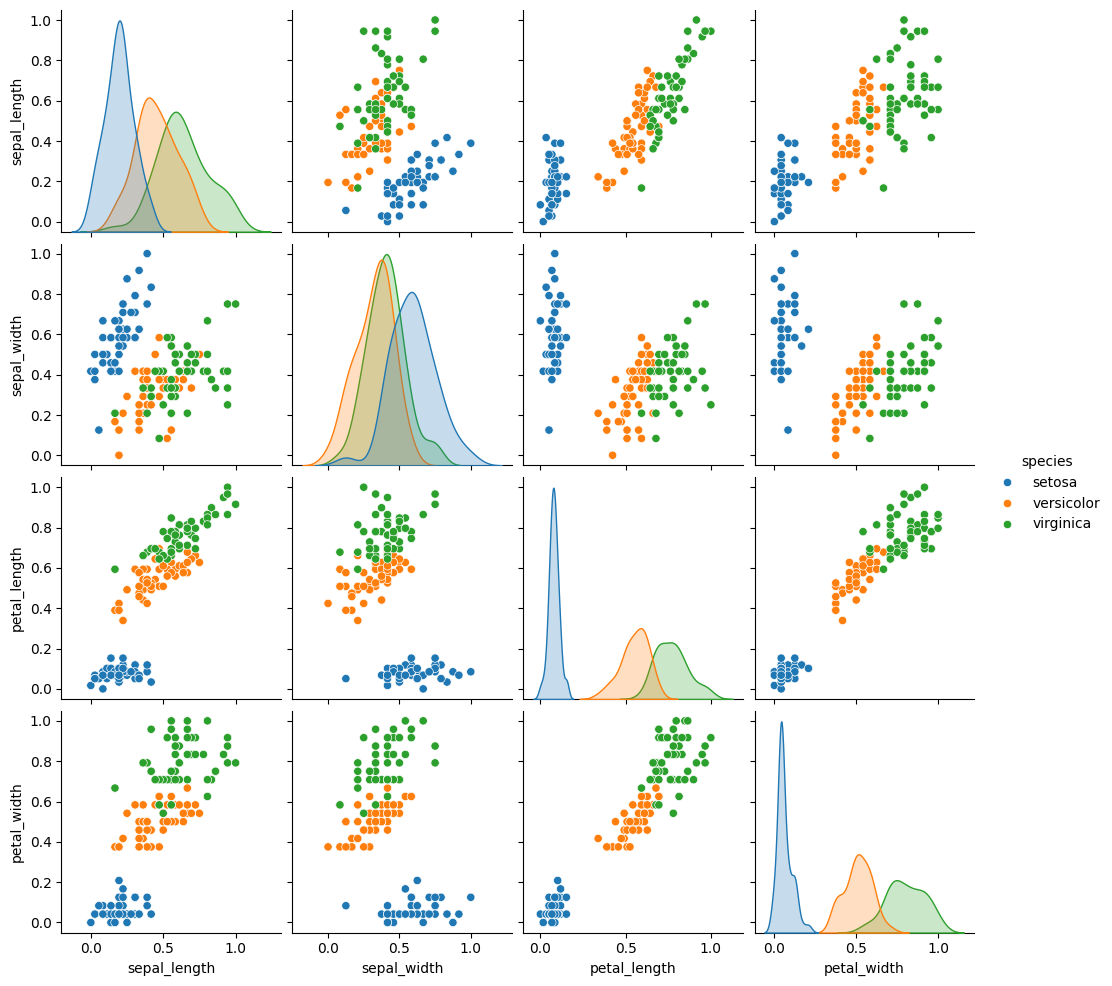

In [27]:
sns.pairplot(df, hue='species')
plt.show()

In [12]:
print("\nSummary Statistics Grouped by Species:\n", df.groupby('species').agg(['mean', 'median', 'min', 'max', 'std']))


Summary Statistics Grouped by Species:
         sepal_length                                         sepal_width  \
                mean    median       min       max       std        mean   
species                                                                    
0           0.196111  0.194444  0.000000  0.416667  0.097914    0.595000   
1           0.454444  0.444444  0.166667  0.750000  0.143381    0.320833   
2           0.635556  0.611111  0.166667  1.000000  0.176633    0.405833   

                                                petal_length            \
           median       min       max       std         mean    median   
species                                                                  
0        0.583333  0.125000  1.000000  0.157943     0.078305  0.084746   
1        0.333333  0.000000  0.583333  0.130749     0.552542  0.567797   
2        0.416667  0.083333  0.750000  0.134374     0.771525  0.771186   

                                      petal_width        

In [13]:
for species in [0, 1, 2]:  # Encoded species values
    print(f"\nStatistics for Species {species}:")
    print(iris_df[iris_df['species'] == species].describe(percentiles=[.25, .5, .75]))


Statistics for Species 0:
       sepal_length  sepal_width  petal_length  petal_width  species
count     50.000000    50.000000     50.000000    50.000000     50.0
mean       0.196111     0.595000      0.078305     0.060833      0.0
std        0.097914     0.157943      0.029435     0.043911      0.0
min        0.000000     0.125000      0.000000     0.000000      0.0
25%        0.138889     0.500000      0.067797     0.041667      0.0
50%        0.194444     0.583333      0.084746     0.041667      0.0
75%        0.250000     0.697917      0.097458     0.083333      0.0
max        0.416667     1.000000      0.152542     0.208333      0.0

Statistics for Species 1:
       sepal_length  sepal_width  petal_length  petal_width  species
count     50.000000    50.000000     50.000000    50.000000     50.0
mean       0.454444     0.320833      0.552542     0.510833      1.0
std        0.143381     0.130749      0.079646     0.082397      0.0
min        0.166667     0.000000      0.338983   